In [3]:
import pandas as pd
import numpy as np
from dateutil.parser import parse

In [31]:
#Create dataframe
df = pd.DataFrame({'City': ['Taipei', 'Taichung', 'Kaohsiung'],
                   'Temperature': [27, 25, 28],
                   'Humidity': [87, 84, 85]})
df

,City,Temperature,Humidity
0,Taipei,27,87
1,Taichung,25,84
2,Kaohsiung,28,85


In [32]:
#Create dataframe
df2 = pd.DataFrame({'City': ['New York', 'Austin', 'San Diego'],
                   'Temperature': [25, 27, 28],
                   'Humidity': [75, 74, 72]})
df2

,City,Temperature,Humidity
0,New York,25,75
1,Austin,27,74
2,San Diego,28,72


# Concat

In [8]:
#Concat
df_new = pd.concat([df, df2])
print(df_new)

#The one dataframe is added to the other in a vertical sequence.
#However, the index is not ranged in order after concatenation.

#Re-range index
df_new = pd.concat([df, df2], ignore_index = True)
print(df_new) #Index is re-ranged.

        City  Temperature  Humidity
0     Taipei           27        87
1   Taichung           25        84
2  Kaohsiung           28        85
0   New York           25        75
1     Austin           27        74
2  San Diego           28        72
        City  Temperature  Humidity
0     Taipei           27        87
1   Taichung           25        84
2  Kaohsiung           28        85
3   New York           25        75
4     Austin           27        74
5  San Diego           28        72


In [9]:
#Added dataframe horizontally
df_new_horizon = pd.concat([df, df2], axis = 1) #axis default = 0, which is vertical concatenation.
print(df_new_horizon)

        City  Temperature  Humidity       City  Temperature  Humidity
0     Taipei           27        87   New York           25        75
1   Taichung           25        84     Austin           27        74
2  Kaohsiung           28        85  San Diego           28        72


# Groupby

In [4]:
#Create a new date column
date_str = ['2020-12-11', '2020-12-12', '2020-12-13', 
            '2020-12-11', '2020-12-12', '2020-12-13', 
            '2020-12-11', '2020-12-12', '2020-12-13']
#A new list where transformation/parse from str to date format can be operated
new_date = [parse(d) for d in date_str]
#Transform date string into date format in '%Y-%M-%D'
date = [d.strftime('%Y-%m-%d') for d in new_date]

df = pd.DataFrame({'Date': date,
        
                   'City':['New York', 'New York', 'New York', 
                           'Mumbai', 'Mumbai', 'Mumbai', 
                           'Beijing', 'Beijing', 'Beijing'],
                   
                   'Temperature':[65, 66, 68, 75, 78, 82, 80, 77, 79],
                   'Humidity':[56, 58, 60, 80, 83, 85, 50, 40, 35]
                   
})
df

,Date,City,Temperature,Humidity
0,2020-12-11,New York,65,56
1,2020-12-12,New York,66,58
2,2020-12-13,New York,68,60
3,2020-12-11,Mumbai,75,80
4,2020-12-12,Mumbai,78,83
5,2020-12-13,Mumbai,82,85
6,2020-12-11,Beijing,80,50
7,2020-12-12,Beijing,77,40
8,2020-12-13,Beijing,79,35


In [9]:
# Group the dataframe by city
# 1. Split phase
df_group = df.groupby(by = 'City', axis = 0, group_keys = True) 
#print(df_group) # An pandas object is returned

#Check split element 
for group_key, grouped_df in df_group:
    print('The key value for grouping:', group_key)
    #print('------------------------------------------------')
    #print('The grouped dataframe', grouped_df)
    
for group_key, grouped_df in df_group:
    #print('The key value for grouping:', group_key)
    #print('------------------------------------------------')
    print('The grouped dataframe', grouped_df)

The key value for grouping: Beijing
The key value for grouping: Mumbai
The key value for grouping: New York
The grouped dataframe          Date     City  Temperature  Humidity
6  2020-12-11  Beijing           80        50
7  2020-12-12  Beijing           77        40
8  2020-12-13  Beijing           79        35
The grouped dataframe          Date    City  Temperature  Humidity
3  2020-12-11  Mumbai           75        80
4  2020-12-12  Mumbai           78        83
5  2020-12-13  Mumbai           82        85
The grouped dataframe          Date      City  Temperature  Humidity
0  2020-12-11  New York           65        56
1  2020-12-12  New York           66        58
2  2020-12-13  New York           68        60


In [15]:
#Check a exact final dataframe from splits
df_group_get_Beijing = df_group.get_group('Beijing')
print(df_group_get_Beijing)

         Date     City  Temperature  Humidity
6  2020-12-11  Beijing           80        50
7  2020-12-12  Beijing           77        40
8  2020-12-13  Beijing           79        35


In [26]:
# Obtain the maximum value from each column by which we group the dataframe
# 2. Operate/Apply phase: Implement arithemtic or explorative statistics on the split part
df_group_max = df_group.max()

# 3. After 2, the results are subsequently combined and shown.
print(df_group_max)
print('-----------------------------------------')
print('Shape', df_group_max.shape)
print('-----------------------------------------')
print('Maximum value from from each key', df_group_max['Temperature'])
print('-----------------------------------------')
print(df_group_max.iloc[0, 1])

                Date  Temperature  Humidity
City                                       
Beijing   2020-12-13           80        50
Mumbai    2020-12-13           82        85
New York  2020-12-13           68        60
-----------------------------------------
Shape (3, 3)
-----------------------------------------
Maximum value from from each key City
Beijing     80
Mumbai      82
New York    68
Name: Temperature, dtype: int64
-----------------------------------------
80


City
Beijing     AxesSubplot(0.125,0.125;0.775x0.755)
Mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
New York    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

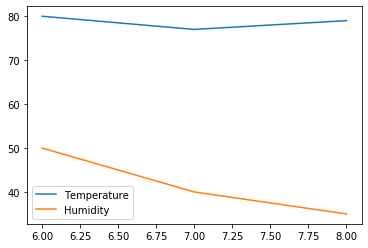

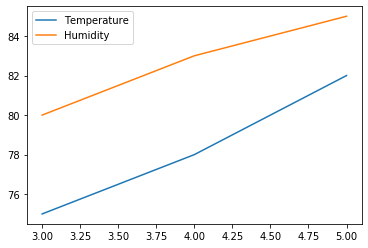

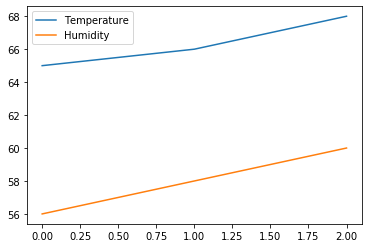

In [28]:
# Plot
%matplotlib inline
df_group.plot()

# Merge

In [29]:
us_agg = pd.read_csv('C:\\Users\\ASUS\\Desktop\\data_2001-2020-05\\Barclays US AGG TR Index USD Unhedged.csv',
                    parse_dates = ['Date'])
usgg_2yr = pd.read_csv('C:\\Users\\ASUS\\Desktop\\data_2001-2020-05\\USGG2YR.csv', parse_dates = ['Date'])

target = pd.read_csv('C:\\Users\\ASUS\\Desktop\\data_2001-2020-05\\Target_SP500.csv', parse_dates = ['Date'])

In [33]:
#Using keys
df_new_keys = pd.concat([df, df2], keys = ['Taiwan', 'US']) #add the names to the corresponding layers 
print(df_new_keys)

#We can easily access the layer with the key we name for the layer.
tw_layer = df_new_keys.loc['Taiwan']
print(tw_layer)

               City  Temperature  Humidity
Taiwan 0     Taipei           27        87
       1   Taichung           25        84
       2  Kaohsiung           28        85
US     0   New York           25        75
       1     Austin           27        74
       2  San Diego           28        72
        City  Temperature  Humidity
0     Taipei           27        87
1   Taichung           25        84
2  Kaohsiung           28        85


# Implement on some practical data

The two practical time-series data are of different length based on datetime column.

In [34]:
print(type(us_agg))
print(us_agg.shape)
print(us_agg.tail(15))

<class 'pandas.core.frame.DataFrame'>
(4843, 4)
           Date  PX_LAST  Change  % Change
4828 2020-04-16  2335.98    4.06  0.174105
4829 2020-04-17  2330.43   -5.55 -0.237588
4830 2020-04-20  2331.72    1.29  0.055355
4831 2020-04-21  2335.38    3.66  0.156966
4832 2020-04-22  2332.57   -2.81 -0.120323
4833 2020-04-23  2335.06    2.49  0.106749
4834 2020-04-24  2336.01    0.95  0.040684
4835 2020-04-27  2329.40   -6.61 -0.282961
4836 2020-04-28  2335.05    5.65  0.242552
4837 2020-04-29  2335.43    0.38  0.016274
4838 2020-04-30  2335.85    0.42  0.017984
4839 2020-05-01  2333.13   -2.72 -0.116446
4840 2020-05-04  2332.06   -1.07 -0.045861
4841 2020-05-05  2330.31   -1.75 -0.075041
4842 2020-05-06  2323.15   -7.16 -0.307255


In [35]:
print(usgg_2yr.shape)
print(usgg_2yr.tail(15))

(5045, 4)
           Date  PX_LAST  Change  % Change
5030 2020-04-16   0.2066  0.0097  4.926359
5031 2020-04-17   0.2019 -0.0047 -2.274927
5032 2020-04-20   0.2016 -0.0003 -0.148588
5033 2020-04-21   0.2034  0.0018  0.892857
5034 2020-04-22   0.2133  0.0099  4.867257
5035 2020-04-23   0.2191  0.0058  2.719175
5036 2020-04-24   0.2245  0.0054  2.464628
5037 2020-04-27   0.2223 -0.0022 -0.979955
5038 2020-04-28   0.2112 -0.0111 -4.993252
5039 2020-04-29   0.2014 -0.0098 -4.640152
5040 2020-04-30   0.1956 -0.0058 -2.879841
5041 2020-05-01   0.1900 -0.0056 -2.862986
5042 2020-05-04   0.1822 -0.0078 -4.105263
5043 2020-05-05   0.1882  0.0060  3.293085
5044 2020-05-06   0.1784 -0.0098 -5.207226


In [44]:
#Try to merge two data 
df_new = pd.merge(us_agg, usgg_2yr, on = 'Date', how = 'outer')
print(df_new)
# The pd.merge() allows data combination following same key name for merge. on = 'Date' in this case.
# We can also assign the left/right key (left_on; right_on) to determine a standard key for combination across two df.
# It is shown that even with different length or content in the key index for merge, the two data can still be combined together.

           Date  PX_LAST_x  Change_x  % Change_x  PX_LAST_y  Change_y  \
0    2001-01-02     938.84       NaN         NaN     4.8620       NaN   
1    2001-01-03     933.62     -5.22   -0.556005     4.9290     0.067   
2    2001-01-04     938.37      4.75    0.508772     4.7870    -0.142   
3    2001-01-05     943.45      5.08    0.541364     4.5690    -0.218   
4    2001-01-08     944.95      1.50    0.158991     4.5600    -0.009   
...         ...        ...       ...         ...        ...       ...   
5040 2019-12-25        NaN       NaN         NaN     1.6210     0.000   
5041 2020-01-01        NaN       NaN         NaN     1.5691     0.000   
5042 2020-01-20        NaN       NaN         NaN     1.5592     0.000   
5043 2020-02-17        NaN       NaN         NaN     1.4279     0.000   
5044 2020-04-10        NaN       NaN         NaN     0.2254     0.000   

      % Change_y  
0            NaN  
1       1.378034  
2      -2.880909  
3      -4.554000  
4      -0.196980  
...      

In [21]:
print(target.shape)

(4866, 4)


In [52]:
df_new2 = pd.merge(target, usgg_2yr, on = 'Date', how = 'left')
print(df_new)
#print(df_new.tail(26))
#print(df_new.head(26))
print(df_new2)
df_new2.isnull().sum()

           Date  PX_LAST_x  Change_x  % Change_x  PX_LAST_y  Change_y  \
0    2001-01-02     938.84       NaN         NaN     4.8620       NaN   
1    2001-01-03     933.62     -5.22   -0.556005     4.9290     0.067   
2    2001-01-04     938.37      4.75    0.508772     4.7870    -0.142   
3    2001-01-05     943.45      5.08    0.541364     4.5690    -0.218   
4    2001-01-08     944.95      1.50    0.158991     4.5600    -0.009   
...         ...        ...       ...         ...        ...       ...   
5040 2019-12-25        NaN       NaN         NaN     1.6210     0.000   
5041 2020-01-01        NaN       NaN         NaN     1.5691     0.000   
5042 2020-01-20        NaN       NaN         NaN     1.5592     0.000   
5043 2020-02-17        NaN       NaN         NaN     1.4279     0.000   
5044 2020-04-10        NaN       NaN         NaN     0.2254     0.000   

      % Change_y  
0            NaN  
1       1.378034  
2      -2.880909  
3      -4.554000  
4      -0.196980  
...      

Date            0
SP500           0
SP500_return    0
SP500_class     0
PX_LAST         0
Change          1
% Change        1
dtype: int64

In [18]:
df_new.to_csv('C:\\Users\\ASUS\\Desktop\\for_check.csv')